In [1]:
import numpy as np
import powerspectrum as ps
import posterior as pt
import random_num as rn
import os
import matplotlib.pyplot as plt

In [2]:
def get_points_from_npy(redshifts,xes,file_name="check.ini",root="output/a_check",p_name=["r"],p_value=[0.001]):
    points=[]
    for i in range(len(redshifts)):
        obj=rn.random_num(True,redshifts[i],xes[i],file_name=file_name,root=root,p_name=p_name,p_value=p_value,verbose=False)
        points.append(obj)
    return points

In [3]:
redshifts=np.load("week8_random/totalz.npy")
xes=np.load("week8_random/totalxe.npy")

In [4]:
points=get_points_from_npy(redshifts,xes,p_value=[0.01])

In [5]:
sigma_nu=2*np.pi/180/60
Tcmb=2.75*10**6
theta_nu=30*np.pi/180/60
spectrum=np.zeros(2002)

for i in np.arange(2,2002,1):
    spectrum[i-2]=(sigma_nu/Tcmb)**2*np.exp(i*(i+1)*theta_nu**2/8/np.log(2))

In [6]:
def error_cal(CL,NNs,ell):
    errors=np.zeros(ell-2)
    f_sky=1
    delta_l=1
    for i in np.arange(2,ell,1):
        errors[i-2]=((CL[i-2]+NNs[i-2])/np.sqrt((i+0.5)*f_sky*delta_l))
    return errors

In [15]:
def plot_ps(data1,data2,ell_E,ell_B,error_E,error_B):
    #data2=np.loadtxt('/home/hcjiang/class/output/base_2018_plikHM_TTTEEE_lowl_lowE_lensing00_cl_lensed.dat')
    l1=data1[:,0]
    l2=data2[:,0]
    EE1=data1[:,1]
    EE2=data2[:,1]
    #plt.plot(l1[0:ell_E-2],EE1[0:ell_E-2],label="random")
    plt.errorbar(l1[0:ell_E-2],EE1[0:ell_E-2],yerr=error_E[0:ell_E-2],label="random")
    plt.plot(l2[0:ell_E-2],EE2[0:ell_E-2],label="best-fit")
    plt.yscale('log')
    plt.legend()
    plt.show()

    BB1=data1[:,2]
    BB2=data2[:,2]
    #plt.plot(l1[0:ell_B-2],BB1[0:ell_B-2],label="random")
    plt.errorbar(l1[0:ell_B-2],BB1[0:ell_B-2],yerr=error_B[0:ell_B-2],label="random")
    plt.plot(l2[0:ell_B-2],BB2[0:ell_B-2],label="best-fit")
    plt.yscale('log')
    plt.legend()
    plt.show()



In [8]:
best_fit_10=np.load("/home/hcjiang/class/result_24_02_15/small/10/best_fit.npy")
best_fit_10_2002=np.load("/home/hcjiang/class/result_24_02_15/small/10_2002/best_fit.npy")
best_fit_2002=np.load("/home/hcjiang/class/result_24_02_15/small/2002/best_fit.npy")

In [9]:
best_fit_10[1]

array([7.625e-03, 1.003e+01])

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.173814
    giving an angle 100*theta_* = 1.044115
 -> baryon drag stops at z = 1059.892934
    corresponding to conformal time = 286.321912 Mpc
    with comoving sound horizon rs = 147.073995 Mpc
 -> many-step reionization gives optical depth = 0.053832


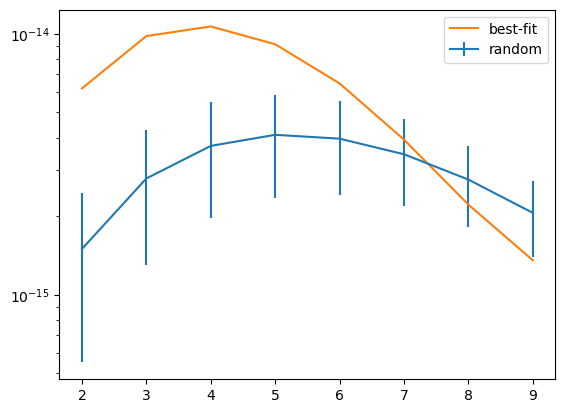

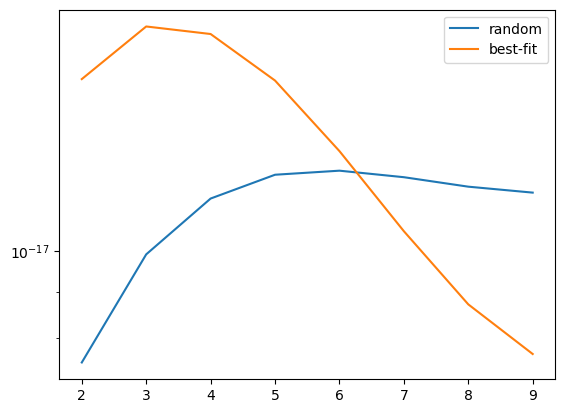

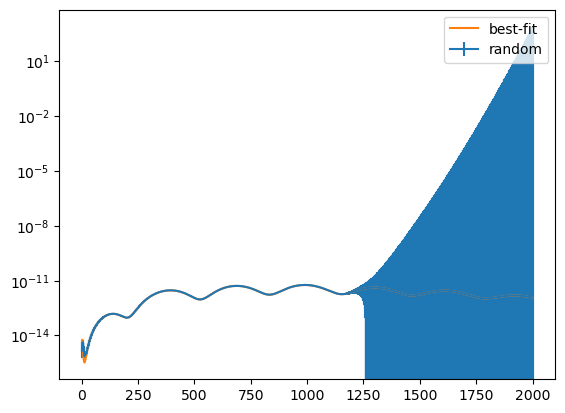

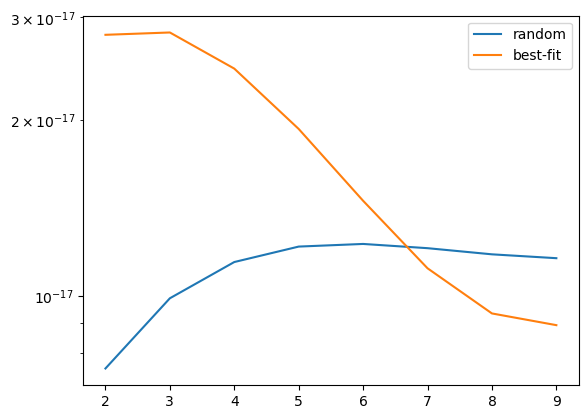

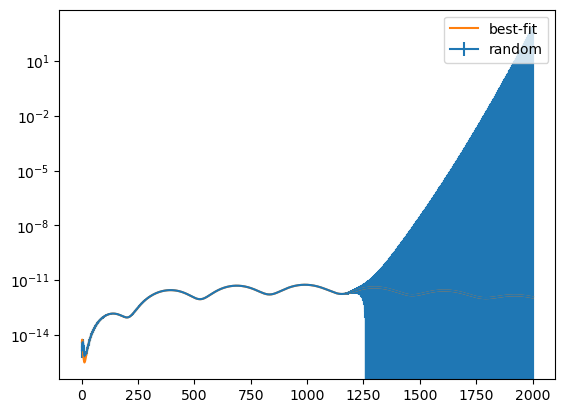

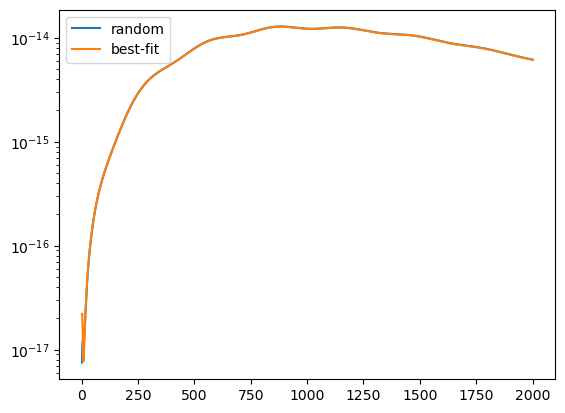

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.069120
    giving an angle 100*theta_* = 1.044828
 -> baryon drag stops at z = 1059.895241
    corresponding to conformal time = 286.321449 Mpc
    with comoving sound horizon rs = 147.073786 Mpc
 -> many-step reionization gives optical depth = 0.066095


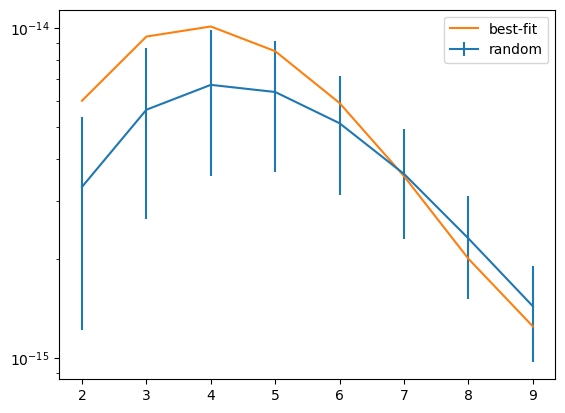

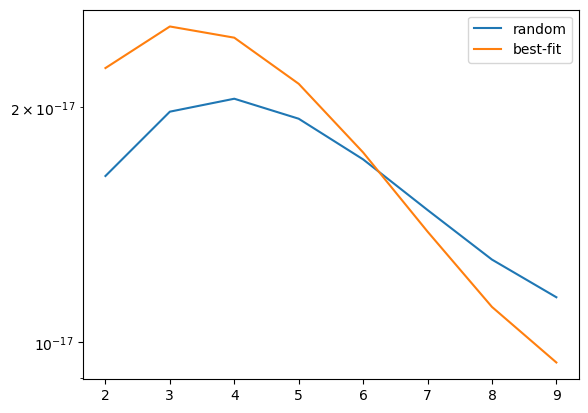

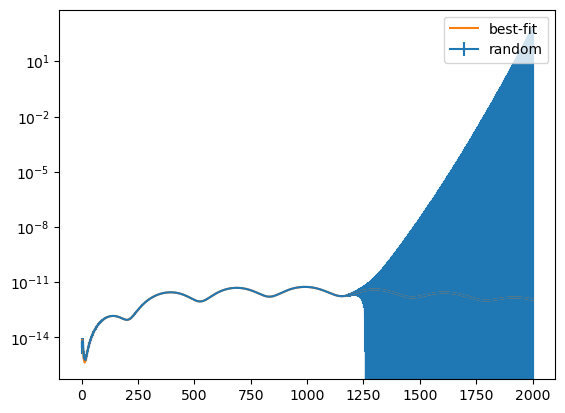

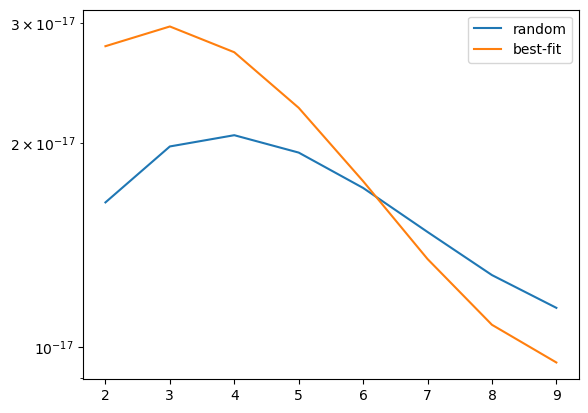

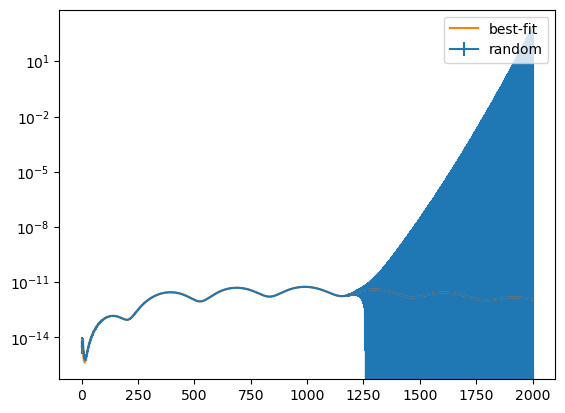

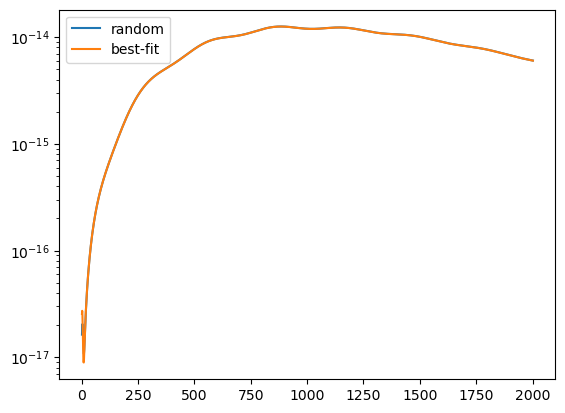

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.946873
    giving an angle 100*theta_* = 1.044261
 -> baryon drag stops at z = 1059.897007
    corresponding to conformal time = 286.321094 Mpc
    with comoving sound horizon rs = 147.073626 Mpc
 -> many-step reionization gives optical depth = 0.056356


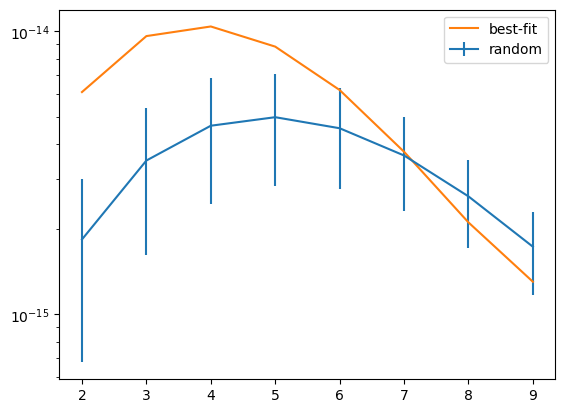

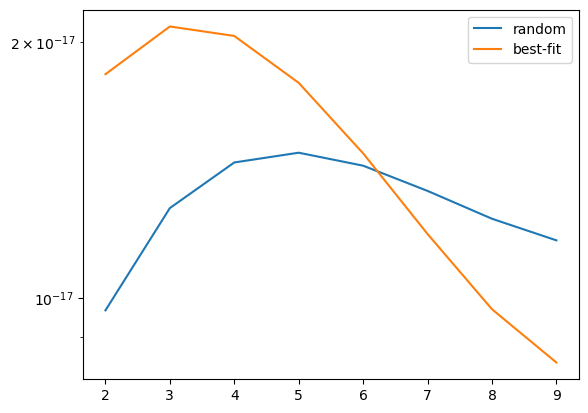

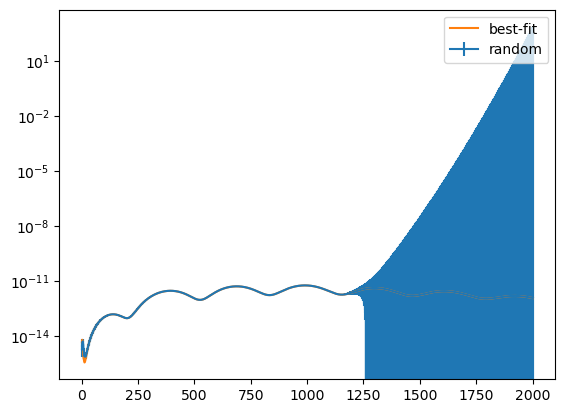

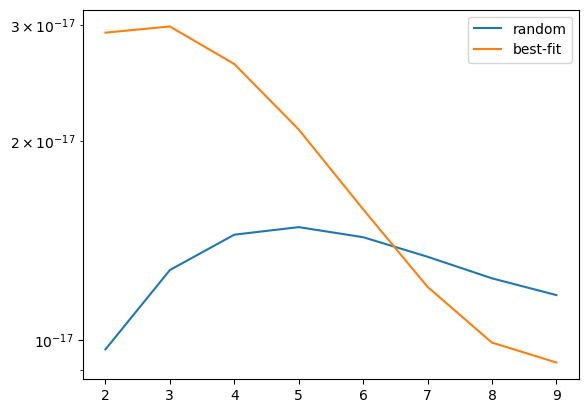

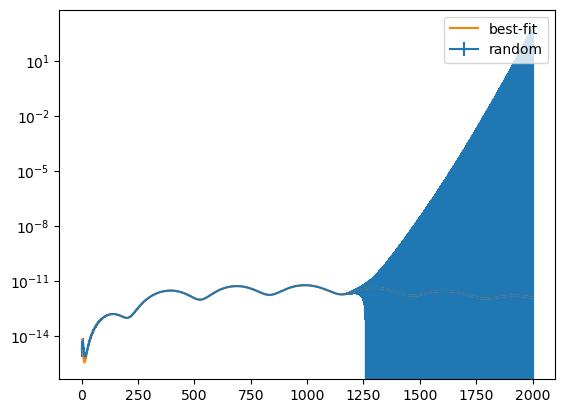

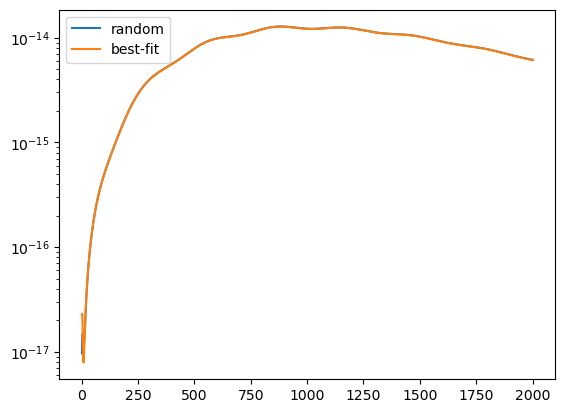

In [16]:
for i in range(3):#len(points)):
    points[i].run()

    data1=np.loadtxt("/home/hcjiang/class/output/a_check00_cl_lensed.dat")
    error_E=error_cal(data1[:,1],spectrum,2002)
    error_B=error_cal(data1[:,2],spectrum,2002)

    #10
    ps.write_ps("fit",["r","z_reio"],best_fit_10[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,10,10,error_E,error_B)
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    #10_2002
    ps.write_ps("fit",["r","z_reio"],best_fit_10_2002[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,2002,10,error_E,error_B)
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    #2002
    ps.write_ps("fit",["r","z_reio"],best_fit_2002[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,2002,2002,error_E,error_B)
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    os.system("rm -rf /home/hcjiang/class/output/a_check*dat")
    

In [5]:
points[-1].run()

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.875659
    giving an angle 100*theta_* = 1.044307
 -> baryon drag stops at z = 1059.889334
    corresponding to conformal time = 286.322634 Mpc
    with comoving sound horizon rs = 147.074320 Mpc
 -> many-step reionization gives optical depth = 0.057148


In [5]:
best_fit=np.load("/home/hcjiang/class/result_24_02_08/large/best_fit.npy")

In [6]:
best_fit

array([[4.00e-04, 1.00e+01],
       [9.00e-04, 1.00e+01],
       [6.00e-04, 1.00e+01],
       [5.00e-04, 1.10e+01],
       [9.00e-04, 1.05e+01],
       [1.10e-03, 1.05e+01],
       [4.00e-04, 9.00e+00],
       [4.00e-04, 1.05e+01],
       [1.10e-03, 1.00e+01],
       [4.00e-04, 9.50e+00],
       [4.00e-04, 1.05e+01],
       [4.00e-04, 1.05e+01],
       [8.00e-04, 9.50e+00],
       [4.00e-04, 1.05e+01],
       [6.00e-04, 1.05e+01],
       [9.00e-04, 7.50e+00],
       [6.00e-04, 1.05e+01],
       [4.00e-04, 1.05e+01],
       [1.10e-03, 1.05e+01],
       [4.00e-04, 9.50e+00]])